# Chapter 2: Statistical learning

## What is Statistical Learning
Examples that show the motivation to use statistical learning

In [1]:
# =======
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
plt.style.use('seaborn-white')

### Advertising Data
Let's have a look at the "Advertising" data set.
The data consists of product sales from 200 markets and their associated tv, radio, and newspaper advertising budgets.

In [2]:
# =======
# reade data set using pandas
df_adv = pd.read_csv('../data/Advertising.csv')

# returns the first 10 rows
df_adv.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


What kind of relationship can be seen between advertising budget and sales?  
Let's recreate Figure 2.1

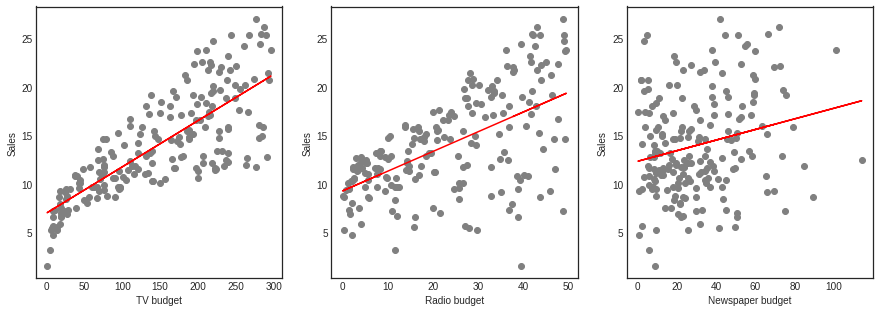

In [3]:
# import modules for least square
from sklearn.linear_model import LinearRegression

# =======
# plot Figure 2.1

fig, axs = plt.subplots(1, 3, figsize=(15,5))

for axis, ii in zip([0, 1, 2], ['TV', 'Radio', 'Newspaper']):
    axs[axis].scatter(df_adv[ii], df_adv['Sales'], color='gray')
    
    # plot least square fit
    linear_regressor = LinearRegression() 
    # sklearn model wants 2D array as input
    X = np.asarray(df_adv[ii]).reshape(-1,1)
    Y = df_adv['Sales']
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    axs[axis].plot(X, Y_pred, color='red')

    # plot axis label
    axs[axis].set_ylabel("Sales")
    axs[axis].set_xlabel(ii + " budget")

## General form of linear model

We can quantify the relationship between input (in this case TV, Radio or Newspaper burdgets) and output (Sales) with the following linear model  
$$Y = f(X) + \epsilon$$  
Where $X$ is the input matrix of predictors and $\epsilon$ is some random error. $f$ is some fixed but unknown systematic relation between $X$ and $Y$. Statistical learning is trying to approximate this function $f$.  
  

In the case with the advertistment data, the red curve describes the function: $Sales = \beta_0 + \beta_1TV + \epsilon$  
where, Y (Sales) - Dependent variable  
X (TV) - Independent variable  
$\beta_0$ - Intercept  
$\beta_1$ - Slope  
$\epsilon$ - Error  

### Linear regression
Linear regression is the simplest and most widely used statistical technique for predictive modelling. It is a supervised learning algorithm for solving regression based tasks.

It is called a linear model as it establishes a linear relationship between the dependent and independent variables. It basically gives us a linear equation like the one above where we have our features as independent variables X with coefficients $\beta

## 2.2 Assessing model accuracy
"_No one method dominates all others_"

### Measunring quality of fit

Mean squared error (MSE) = $$1/n \sum{(y_i - \hat{f}(x_1))^2}$$  
where $y_i$ = observation (true responses), $\hat{f}(x_1)$ = prediction (prediced responses).  
MSE will be small if predicted responses are very close to the true responses.

### Training Data vs Test Data

Training Data - Data used to build a prediction model. Should not be used to validate the model.  
Testing Data - Data used to determine the usefulness of the model. Validates the model. This data is unseen during model building phase.  

We want the choose a method that gives the _lowest test MSE_.  
  
__The following example demonstrates the problems of underfitting and overfitting and how we can use linear regression with polynomial features (spline smoothing) to approximate nonlinear functions. We will train our model with the training data set and test model accuracy by calculating the MSE for the testing data.__

In [4]:
# =======
# import modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [160]:
# =======
# create data set with random error
np.random.seed(0)
n_samples = 50
x = np.sort(np.random.rand(n_samples)).reshape(-1, 1)
error = np.random.randn(n_samples, 1) * 0.4

# the true function that we want to approximate, which is a part of the cosine function. 
true_fun = lambda x: np.cos(1.5 * np.pi * x)
y = true_fun(x) + error


Text(0, 0.5, 'y')

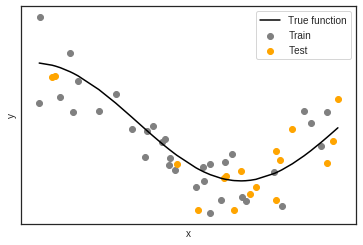

In [161]:
# Dividing data into train and validation datasets and plot it
# =======

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state = 1)

# plot training and test data
fig, ax = plt.subplots()
plt.setp(ax, xticks=(), yticks=())
ax.scatter(x_train,y_train, c='gray', label='Train')
ax.scatter(x_test,y_test, c='orange', label='Test')
plt.plot(x, true_fun(x), c='black', label="True function")
ax.legend(frameon=True)
plt.xlabel("x")
plt.ylabel("y")

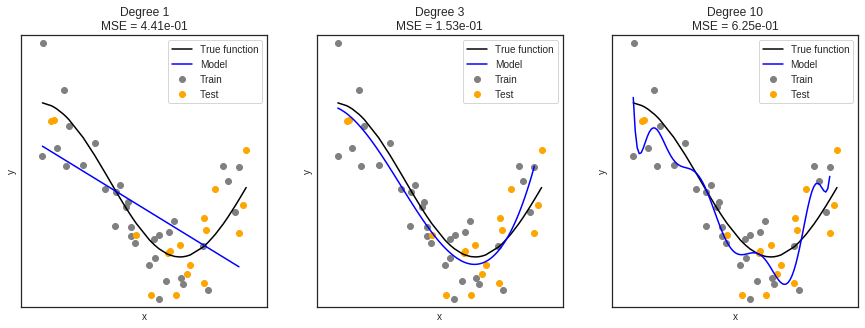

In [172]:
# =======
# Train our models that have polynomial features of different degrees

degrees = [1, 3, 10]

fig, axs = plt.subplots(1, 3, figsize=(15,5))
for ii in range(len(degrees)):
    
    # define polynomial_features: Degree of Freedom
    polynomial_features = PolynomialFeatures(degree=degrees[ii], include_bias=False)
    
    # Create linear regression object
    linear_regression = LinearRegression()
    
    #pipeline is to assemble several steps
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

    # Train the model using the training sets
    pipeline.fit(x_train, y_train)
    #print(linear_regression.coef_)
    #print(linear_regression.intercept_)

    # plot training and test data, and true function
    axs[ii].scatter(x_train,y_train, c='gray', label='Train')
    axs[ii].scatter(x_test,y_test, c='orange', label='Test')
    axs[ii].plot(x, true_fun(x), c='black', label="True function")

    # plot predictions: use sorted points
    x_sorted = np.linspace(min(x_train), max(x_train), 100)
    axs[ii].plot(x_sorted, pipeline.predict(x_sorted), label="Model", c='blue')
    
    # Evaluate the models using mean_squared_error with the test dataset
    MSE = mean_squared_error(y_test, pipeline.predict(x_test))
    axs[ii].set_title("Degree {}\nMSE = {:.2e}".format(
                                               degrees[ii], MSE))
    
    # make plot nice
    axs[ii].legend(frameon=True, loc="best")
    plt.setp(axs[ii], xticks=(), yticks=())
    axs[ii].set_xlabel("x")
    axs[ii].set_ylabel("y")
    axs[ii].set_xlim((min(x)-0.1, max(x)+0.1))
    axs[ii].set_ylim((min(y)-0.1, max(y)+0.1))

We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called __underfitting__. A polynomial of degree 3 approximates the true function almost perfectly. However, for higher degrees the model will __overfit__ the training data, i.e. it learns the noise of the training data. We evaluate quantitatively __overfitting / underfitting__ by using calculating the mean squared error (MSE) on the test/validation set, the lower, the more likely the model generalizes correctly from the training data.  

![alt text](../figures/overfit.png "Example of underfitting and overfitting")

As we can see below, a non-linear _f_ with a degree of freedom between 2 and 6 has the lowest test MSE.






(0, 0.5)

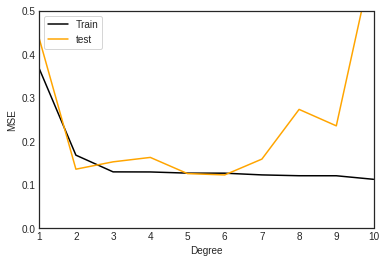

In [176]:
# =======
# find lowest test MSE

degrees = np.arange(1,11,1)

MSE_train = []
MSE_test = []
for ii in range(len(degrees)):
    
    # define polynomial_features: Degree of Freedom
    polynomial_features = PolynomialFeatures(degree=degrees[ii], include_bias=False)
    
    # Create linear regression object
    linear_regression = LinearRegression()
    
    #pipeline is to assemble several steps
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

    # Train the model using the training sets
    pipeline.fit(x_train, y_train)
    
    # training MSE
    MSE_train.append(mean_squared_error(y_train, pipeline.predict(x_train)))
    # test MSE
    MSE_test.append(mean_squared_error(y_test, pipeline.predict(x_test)))
    
fig, ax = plt.subplots()
ax.plot(degrees,MSE_train, c='black', label="Train")
ax.plot(degrees,MSE_test, c='orange',label="test")
ax.legend(frameon=True, loc="best")
ax.set_xlabel("Degree")
ax.set_ylabel("MSE")
plt.xlim((1, 10))
plt.ylim((0, 0.5))